calculated columns:

age, adults_in_home, day_a_customer, chrismas_shopper, household_members

In [33]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
myfile = 'marketing_campaign.csv'

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df_raw = pd.read_csv(myfile, sep='\t')
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


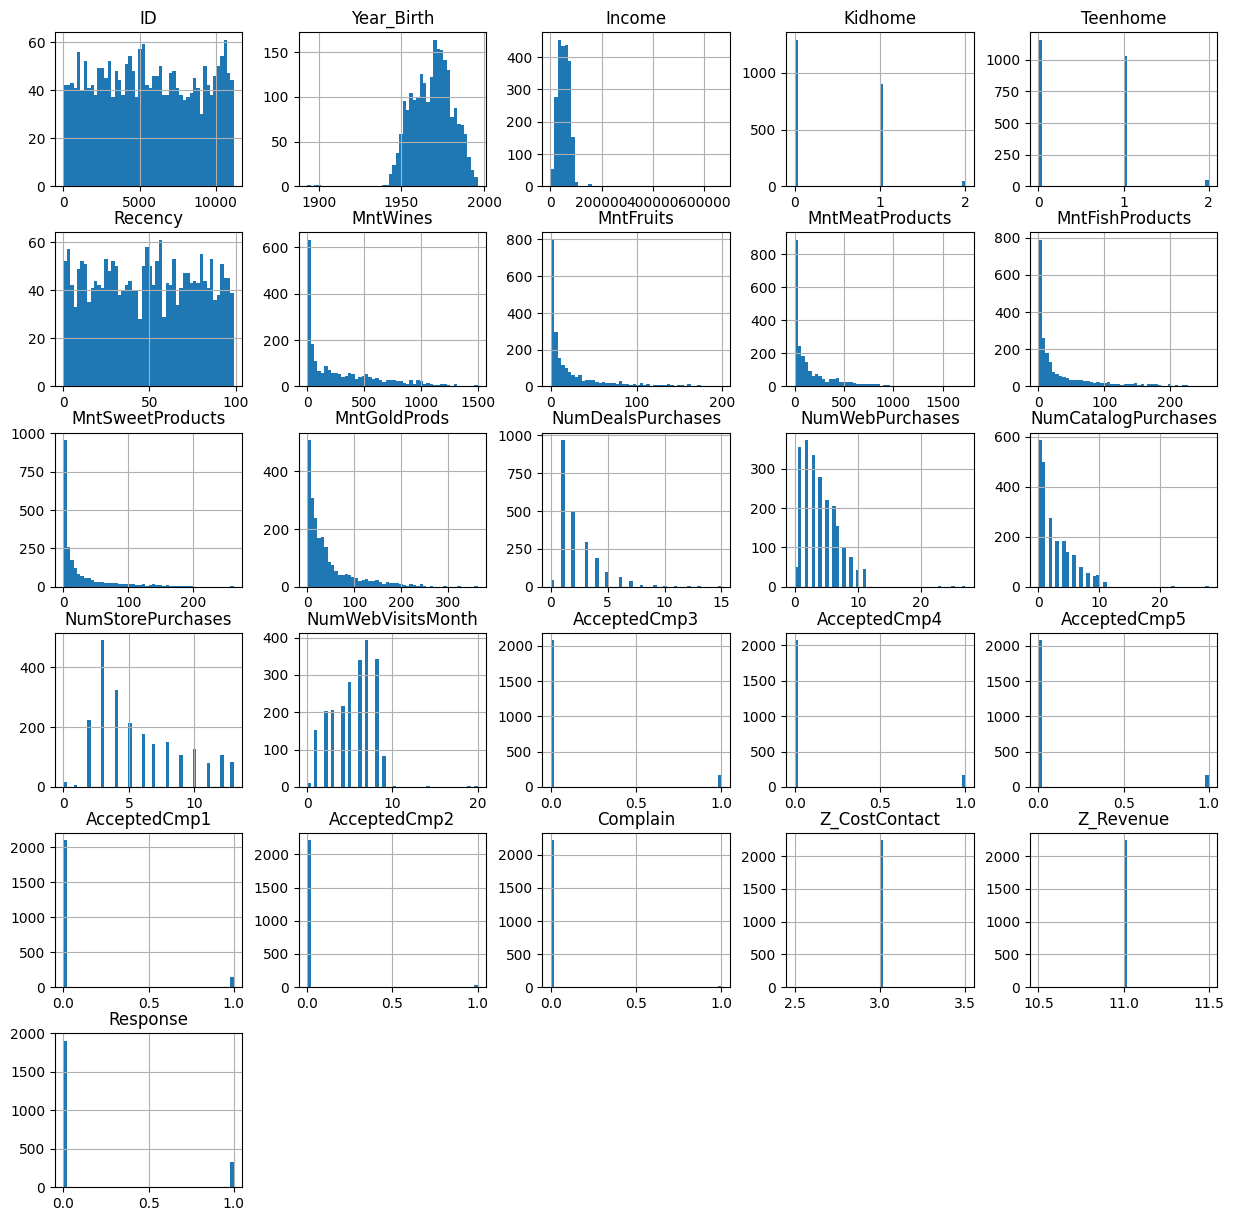

In [37]:
df_raw.hist(bins=50, figsize=(15,15))
plt.show()

**People**  
ID: Customer's unique identifier    
Year_Birth: Customer's birth year   
Education: Customer's education level   
Marital_Status: Customer's marital status   
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household     
Teenhome: Number of teenagers in customer's household   
Dt_Customer: Date of customer's enrollment with the company     
Recency: Number of days since customer's last purchase  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise 

**Products**    
MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years   
MntMeatProducts: Amount spent on meat in last 2 years   
MntFishProducts: Amount spent on fish in last 2 years   
MntSweetProducts: Amount spent on sweets in last 2 years    
MntGoldProds: Amount spent on gold in last 2 years  

**Promotion**   
NumDealsPurchases: Number of purchases made with a discount     
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise     
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise     
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise     
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise     
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise     
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise        

**Place**   
NumWebPurchases: Number of purchases made through the company’s website     
NumCatalogPurchases: Number of purchases made using a catalogue     
NumStorePurchases: Number of purchases made directly in stores      
NumWebVisitsMonth: Number of visits to company’s website in the last month      

**Target**  
Need to perform clustering to summarize customer segments.

In [38]:
df_raw['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [39]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [40]:
unique_responses = len(df_raw.ID.unique())
print('number of unique responses = '+ str(unique_responses) )

number of unique responses = 2240


In [41]:
df_raw.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [67]:
df_raw.isnull().sum().index

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'days_a_customer',
       'age', 'chrismas_shopper', 'adults_in_home', 'household_members'],
      dtype='object')

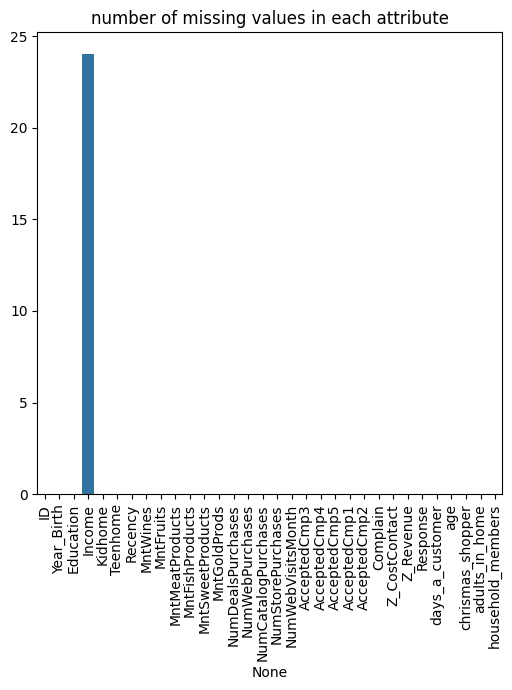

In [72]:
plt.figure(figsize=(6,6))
sns.barplot(x=df_raw.isnull().sum().index, y=df_raw.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('number of missing values in each attribute')
plt.show()

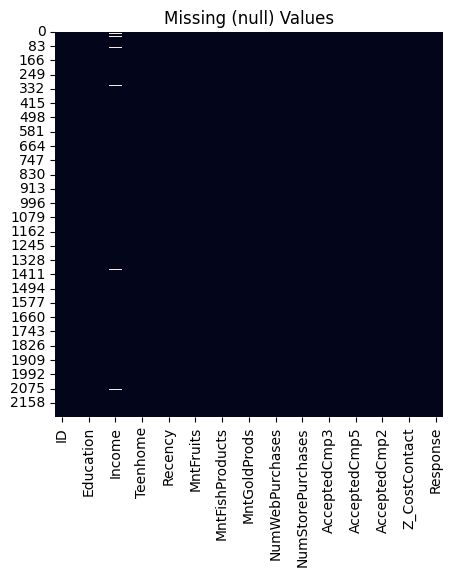

In [43]:
plt.figure(figsize=(5,5))

sns.heatmap(df_raw.isnull(),cbar=False)
plt.title('Missing (null) Values')
plt.show()

In [44]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [45]:
df_raw.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [46]:
df_raw.duplicated().sum()

0

In [47]:
print('number of null (missing) values:\n', df_raw['Income'].isna().value_counts())

number of null (missing) values:
 Income
False    2216
True       24
Name: count, dtype: int64


**Level 1 cleaning**
1.renaming columns


In [48]:
df_01 = df_raw

**Level 2** cleaning

converting Dt_Customer to datetime type:

In [49]:
df_01['Dt_Customer'] = pd.to_datetime(df_01['Dt_Customer'], format = "%d-%m-%Y")

Intuitively, duration of being a customer is more important than the exact date of doing the first purchase. So, we can create a new feature by calculating this value for each customer.
Additionally, we can analyze if first purchase in special occasions like chrismas can affect customer behaviore in long run. To do this we will need a new feature that labels the customer as a promotion time (or chrismas) customer or not.

to create the duration of being a customer we can calculate the duration till now. But the dataset time window is far from current time. So, we can find the maximum date in the table and calculate the duration till that time.

In [50]:
virtual_today = df_01['Dt_Customer'].max()
virtual_today = virtual_today.replace(day= virtual_today.day+1)

In [51]:
# adding a calculated column that contains duration of customer relationship
df_01['days_a_customer'] = virtual_today - df_01['Dt_Customer']

Birth year also may not be usefull. I t would be better to create age. We will use 'virtual_today' to calculate age for each customer.

In [52]:
df_01['age'] = virtual_today.year - df_01['Year_Birth']

We can define chrismas soppers as customers who did their first puchase in late December.

In [53]:

df_01['chrismas_shopper'] = ((df_01['Dt_Customer'].dt.month == 12) & ((df_01['Dt_Customer'].dt.day >= 15) & (df_01['Dt_Customer'].dt.day <=30))).astype('int')
#df_01['chrismas_shopper'] = df_01['Dt_Customer'].dt.month == 12
df_01['chrismas_shopper'].value_counts()

chrismas_shopper
0    2150
1      90
Name: count, dtype: int64

In [54]:
df_01.drop(columns=['Dt_Customer'], inplace= True)

**We need to convert education string values to numeric**

In [55]:
#creating education dictionary and replacing values in data frame
unique_education_strings = list(df_01['Education'].unique())
unique_education_strings

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

In [56]:
unique_education_strings = unique_education_strings[-2:] + unique_education_strings[:-2] #arranging the array order for cognitive consistency
unique_education_strings[3],unique_education_strings[4] = unique_education_strings[4], unique_education_strings[3]
education_string_2_numeric_dict ={string: index + 1 for index, string in enumerate(unique_education_strings)}
education_string_2_numeric_dict

{'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

In [57]:
df_01['Education'] = df_01['Education'].map(lambda x : education_string_2_numeric_dict.get(x))

marital status is another column that is string type and have missing (irrelevant) values as strings. We need to map strings to appropriate numerical values or null.

In [58]:
#creating marital status dictionary and replacing values in data frame?
unique_marital_strings = list(df_01['Marital_Status'].unique())
df_01['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In creating the dictionary we neglect the possibility of cases that reported status may convey intimate retionship between more than two adults.

In [59]:
marital_status_dict = {'Single': 1 ,'Together': 2, 'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1, 'Absurd': np.NaN, 'YOLO': np.NaN}
df_01['adults_in_home'] = df_01['Marital_Status']

In [60]:

df_01['adults_in_home'] = df_01['adults_in_home'].map(lambda x : marital_status_dict.get(x))

In [61]:
df_01['adults_in_home'].isnull().value_counts()

adults_in_home
False    2236
True        4
Name: count, dtype: int64

In the next step I remove null values of 'adults_in_home'

In [62]:
df_01.dropna(axis=0, subset='adults_in_home', inplace= True)


In [63]:
df_01.drop(columns=['Marital_Status'], inplace=True)

In the next step I will create household members.

In [64]:
df_01['household_members'] = df_01['adults_in_home'] + df_01['Kidhome'] + df_01['Teenhome']

There are several options for dealing with missing values in 'Income' column. We can delete the rows or impute them with mean or median. But I want to train an ML model to predict the missing values based on some related atteributes in dataset and impute them.

In [65]:
df_01['Income'].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64